<a href="https://colab.research.google.com/github/Berk3459/USD-TRY-Exchange-prediction-ARIMA-MODEL/blob/main/time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [ ]:
df = sns.load_dataset("tips")

In [ ]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


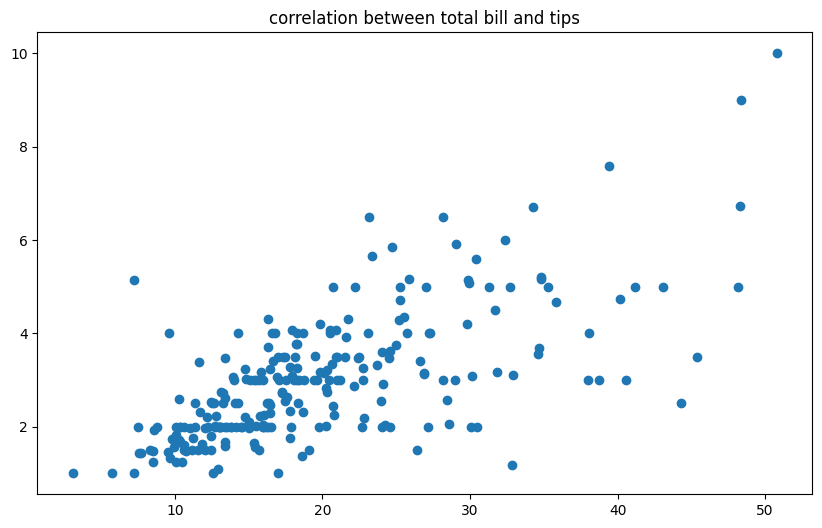

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['total_bill'],df['tip'],)
plt.title('correlation between total bill and tips')
plt.show()

In [ ]:
cons = sm.add_constant(df['total_bill'])
dependent_val = df['tip']
model = sm.OLS(dependent_val,cons).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           6.69e-34
Time:                        12:06:30   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
data = yf.download("AMZN", start="2017-01-01", end="2017-04-30")
data.head(3)

/tmp/ipython-input-13-3205545093.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AMZN", start="2017-01-01", end="2017-04-30")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2017-01-03,37.683498,37.938000,37.384998,37.896000,70422000
2017-01-04,37.859001,37.984001,37.709999,37.919498,50210000
2017-01-05,39.022499,39.119999,38.013000,38.077499,116602000


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<Figure size 800x700 with 0 Axes>

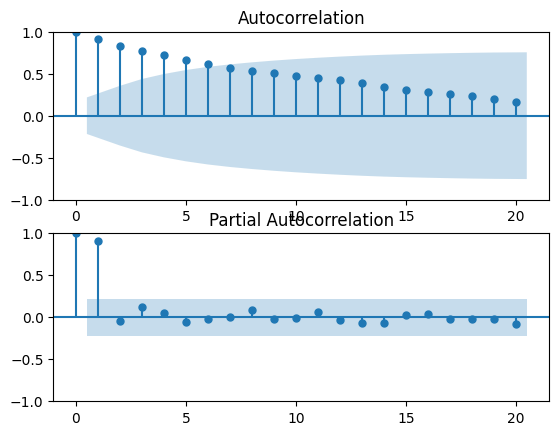

In [ ]:
plt.figure(figsize=(8,7))
fig,(ax1,ax2) = plt.subplots(2,1)
plot_acf(data['Close'],lags=len(data)/4, ax=ax1)
plot_pacf(data['Close'],lags = len(data)/4 ,ax=ax2)
plt.show()

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 12.6 MB/s eta 0:00:00


**ADF,PP,KPSS**

In [ ]:
from arch.unitroot import ADF,PhillipsPerron,KPSS

In [ ]:
df = yf.download('AAPL',start = '2022-01-01',end='2022-12-31' )

/tmp/ipython-input-18-2698841752.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL',start = '2022-01-01',end='2022-12-31' )
[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head(3)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.645645,179.499574,174.425140,174.542917,104487900
2022-01-04,176.378326,179.558442,175.809046,179.254175,99310400
2022-01-05,171.686707,176.839663,171.411883,176.290017,94537600


In [ ]:
df = df.reset_index()

In [ ]:
def unitroot(yt):
  model = ["n","c","ct"]
  for i in model:
    try:
      adf = ADF(yt,trend=i,method='aic')
      print(adf)
      pp = PhillipsPerron(yt,trend=i)
      print(pp)
      kpss = KPSS(yt,trend=i)
      print(kpss)
    except ValueError:
      continue


In [ ]:
unitroot(df)

In [ ]:
plt.plot(data.index,data['Close'])
plt.show()

In [ ]:
adf = ADF(data['Close'])
adf # p degeri 0.05 de küçük olmadığından h0 reddedemiyoruz yani durağan değil

In [ ]:
adf_details = ADF(data['Close'],trend='ct' ,method='aic')
adf_details.regression.summary()# ct yani sabit ve trend var

In [ ]:
pp = PhillipsPerron(data['Close'])
pp

In [ ]:
print("a")

###duraganlaştırma yontemleri


In [ ]:
df.head(3)

Ticker,Date,AAPL
0,2022-01-03,178.645645
1,2022-01-04,176.378326
2,2022-01-05,171.686707


In [ ]:

df.reset_index(inplace=True)

In [ ]:
df.drop(columns=["Date"])

Ticker,AAPL
0,178.645645
1,176.378326
2,171.686707
3,168.820679
4,168.987518
...,...
246,130.173798
247,128.367172
248,124.428207
249,127.952568


In [ ]:
import numpy as np

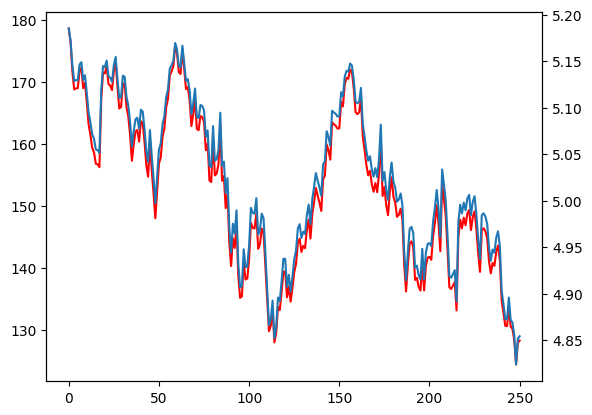

In [ ]:
y= df['AAPL']
log_df = np.log(y)
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(y,color="r")
ax2.plot(log_df)
plt.show()